In [2]:
import numpy as np
import numpy.matlib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import statsmodels.api as sm

In [3]:
airbnb = pd.read_csv('cleaned.csv')

Q1, Q3 = airbnb.price.quantile([0.25, 0.75])
airbnb_no = airbnb[ (airbnb.price >= Q1-1.5 * (Q3-Q1)) & (airbnb.price <= Q3+1.5 * (Q3-Q1))]

group_dict = {'Central Region' : 0, 'East Region' : 1, 'North Region': 2, 'North-East Region': 3, 'West Region': 4 }
room_dict = {'Private room' : 0, 'Entire home/apt' : 1, 'Shared room': 2 }
airbnbMapped = airbnb.copy()
airbnbMapped.neighbourhood_group = airbnbMapped.neighbourhood_group.map(group_dict)
airbnbMapped.room_type = airbnbMapped.room_type.map(room_dict)

airbnbMapped_no = airbnb_no.copy()
airbnbMapped_no.neighbourhood_group = airbnbMapped_no.neighbourhood_group.map(group_dict)
airbnbMapped_no.room_type = airbnbMapped_no.room_type.map(room_dict)

In [4]:
airbnb

,name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,host
0,COZICOMFORT LONG TERM STAY ROOM 2,North Region,Woodlands,Private room,83,180,1,2013-10-21,0.01,2,365,266763: Francesca
1,Pleasant Room along Bukit Timah,Central Region,Bukit Timah,Private room,81,90,18,2014-12-26,0.28,1,365,227796: Sujatha
2,COZICOMFORT,North Region,Woodlands,Private room,69,6,20,2015-10-01,0.20,2,365,266763: Francesca
3,Ensuite Room (Room 1 & 2) near EXPO,East Region,Tampines,Private room,206,1,14,2019-08-11,0.15,9,353,367042: Belinda
4,B&B Room 1 near Airport & EXPO,East Region,Tampines,Private room,94,1,22,2019-07-28,0.22,9,355,367042: Belinda
5,Room 2-near Airport & EXPO,East Region,Tampines,Private room,104,1,39,2019-08-15,0.38,9,346,367042: Belinda
6,3rd level Jumbo room 5 near EXPO,East Region,Tampines,Private room,208,1,25,2019-07-25,0.25,9,172,367042: Belinda
7,"Long stay at The Breezy East ""Leopard""",East Region,Bedok,Private room,50,90,174,2019-05-31,1.88,4,59,1017645: Bianca
8,"Long stay at The Breezy East ""Plumeria""",East Region,Bedok,Private room,54,90,198,2019-04-28,2.08,4,133,1017645: Bianca
9,"Long stay at The Breezy East ""Red Palm""",East Region,Bedok,Private room,42,90,236,2019-07-31,2.53,4,147,1017645: Bianca


In [5]:
by_nbhd_group = airbnb.neighbourhood_group.value_counts()
by_nbhd = pd.value_counts(airbnb.neighbourhood)
by_room_type = pd.value_counts(airbnb.room_type)

print('Number of neighborhood groups: ' + str(by_nbhd_group.shape[0]))
print('Number of neighborhoods: ' + str(by_nbhd.shape[0]))
print('Number of room types: ' + str(by_room_type.shape[0]))

Number of neighborhood groups: 5
Number of neighborhoods: 43
Number of room types: 3


In [6]:
test = airbnb.groupby('neighbourhood_group')
test['price'].mean()

neighbourhood_group
Central Region       176.629418
East Region          142.503937
North Region         110.779412
North-East Region     99.838150
West Region          175.974074
Name: price, dtype: float64

In [7]:
central_region = airbnbMapped[airbnbMapped.neighbourhood_group == 0]
east_region = airbnbMapped[airbnbMapped.neighbourhood_group == 1]
north_region = airbnbMapped[airbnbMapped.neighbourhood_group == 2]
north_east_region = airbnbMapped[airbnbMapped.neighbourhood_group == 3]
west_region = airbnbMapped[airbnbMapped.neighbourhood_group == 4]

In [8]:
Q1, Q3 = central_region.price.quantile([0.25, 0.75])
central_region_no = central_region[ (central_region.price >= Q1-1.5 * (Q3-Q1)) & (central_region.price <= Q3+1.5 * (Q3-Q1))]

Q1, Q3 = east_region.price.quantile([0.25, 0.75])
east_region_no = east_region[ (east_region.price >= Q1-1.5 * (Q3-Q1)) & (east_region.price <= Q3+1.5 * (Q3-Q1))]

Q1, Q3 = north_region.price.quantile([0.25, 0.75])
north_region_no = north_region[ (north_region.price >= Q1-1.5 * (Q3-Q1)) & (north_region.price <= Q3+1.5 * (Q3-Q1))]

Q1, Q3 = east_region.price.quantile([0.25, 0.75])
north_east_region_no = north_east_region[ (north_east_region.price >= Q1-1.5 * (Q3-Q1)) & (north_east_region.price <= Q3+1.5 * (Q3-Q1))]

Q1, Q3 = west_region.price.quantile([0.25, 0.75])
west_region_no = west_region[ (west_region.price >= Q1-1.5 * (Q3-Q1)) & (west_region.price <= Q3+1.5 * (Q3-Q1))]

In [9]:
print('Central Region Mean (w/ outliers): ' + str(central_region.price.mean()))
print('Central Region Mean (no outliers): ' + str(central_region_no.price.mean()))
print()
print('East Region Mean (w/ outliers): ' + str(east_region.price.mean()))
print('East Region Mean (no outliers): ' + str(east_region_no.price.mean()))
print()
print('North Region Mean (w/ outliers): ' + str(north_region.price.mean()))
print('North Region Mean (no outliers): ' + str(north_region_no.price.mean()))
print()
print('North-East Region Mean (w/ outliers): ' + str(north_east_region.price.mean()))
print('North-East Region Mean (no outliers): ' + str(north_east_region_no.price.mean()))
print()
print('West Region Mean (w/ outliers): ' + str(west_region.price.mean()))
print('West Region Mean (no outliers): ' + str(west_region_no.price.mean()))

Central Region Mean (w/ outliers): 176.62941829132984
Central Region Mean (no outliers): 143.45387823185987

East Region Mean (w/ outliers): 142.50393700787401
East Region Mean (no outliers): 101.97933884297521

North Region Mean (w/ outliers): 110.77941176470588
North Region Mean (no outliers): 84.1436170212766

North-East Region Mean (w/ outliers): 99.83815028901734
North-East Region Mean (no outliers): 76.53191489361703

West Region Mean (w/ outliers): 175.97407407407408
West Region Mean (no outliers): 84.36157024793388


In [10]:
X = airbnb_no[['minimum_nights', 'availability_365', 'calculated_host_listings_count']]
Y = airbnb_no.price

knn = KNeighborsClassifier(n_neighbors = 50).fit(X, Y)
y_pred = knn.predict(X)

x_arr = np.array(X)
y_arr = np.array(airbnb_no[['price']])

#plt.scatter(x_arr[:, 0], x_arr[:, 1], c = y_pred, s = 50, cmap = 'viridis')
#print(y_pred)
#plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.5)

In [11]:
print("Accuracy: ", metrics.accuracy_score(Y, y_pred))

Accuracy:  0.11262033495977845


In [12]:
airbnb.groupby('room_type').mean()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
room_type,,,,,,
Entire home/apt,226.998306,15.495644,12.183688,1.087075,62.797193,211.101888
Private room,110.938480,21.539781,13.609879,1.027990,15.984028,198.209406
Shared room,65.675127,4.055838,12.461929,0.755668,19.200508,274.060914


# Actual Stuff

### Correlation Matrix / Heatmap

In [13]:
corr = airbnbMapped_no.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm')

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,1,-0.240614,-0.190921,0.0784671,-0.0491123,-0.0814569,-0.172034,-0.0726363
room_type,-0.240614,1,0.357132,-0.0977066,-0.0210976,-0.0182124,0.255168,0.0856046
price,-0.190921,0.357132,1,-0.109034,-0.0530494,0.0490201,0.216744,0.104062
minimum_nights,0.0784671,-0.0977066,-0.109034,1,-0.078964,-0.141463,-0.0122529,0.15915
number_of_reviews,-0.0491123,-0.0210976,-0.0530494,-0.078964,1,0.630652,-0.152066,-0.0661746
reviews_per_month,-0.0814569,-0.0182124,0.0490201,-0.141463,0.630652,1,-0.196517,-0.109293
calculated_host_listings_count,-0.172034,0.255168,0.216744,-0.0122529,-0.152066,-0.196517,1,0.244792
availability_365,-0.0726363,0.0856046,0.104062,0.15915,-0.0661746,-0.109293,0.244792,1


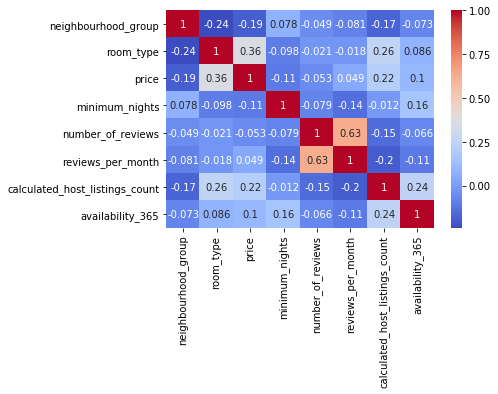

In [14]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="coolwarm",annot=True)

### Price Distribution

In [19]:
airbnb.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7907.000000,7907.000000,7907.000000,5149.000000,7907.000000,7907.000000
mean,169.332996,17.510054,12.807386,1.043669,40.607689,208.726318
std,340.187599,42.094616,29.707746,1.285851,65.135253,146.120034
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,65.000000,1.000000,0.000000,0.180000,2.000000,54.000000
50%,124.000000,3.000000,2.000000,0.550000,9.000000,260.000000
75%,199.000000,10.000000,10.000000,1.370000,48.000000,355.000000
max,10000.000000,1000.000000,323.000000,13.000000,274.000000,365.000000


In [15]:
#add new column price labels 
airbnb2=airbnb.copy()
airbnb2["price_labels"]= ""
for k in range(0, 7907):
    if airbnb2.iloc[k, 4] >=199:
        airbnb2.iloc[k, 12] = 'High Price'
    elif airbnb2.iloc[k, 4] >=124:
         airbnb2.iloc[k, 12] = 'Average Price'
    else:
         airbnb2.iloc[k, 12] = 'Low Price'
airbnb2.head()

,name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,host,price_labels
0,COZICOMFORT LONG TERM STAY ROOM 2,North Region,Woodlands,Private room,83,180,1,2013-10-21,0.01,2,365,266763: Francesca,Low Price
1,Pleasant Room along Bukit Timah,Central Region,Bukit Timah,Private room,81,90,18,2014-12-26,0.28,1,365,227796: Sujatha,Low Price
2,COZICOMFORT,North Region,Woodlands,Private room,69,6,20,2015-10-01,0.20,2,365,266763: Francesca,Low Price
3,Ensuite Room (Room 1 & 2) near EXPO,East Region,Tampines,Private room,206,1,14,2019-08-11,0.15,9,353,367042: Belinda,High Price
4,B&B Room 1 near Airport & EXPO,East Region,Tampines,Private room,94,1,22,2019-07-28,0.22,9,355,367042: Belinda,Low Price


Text(0.5, 1.0, 'Pie chart of Price')

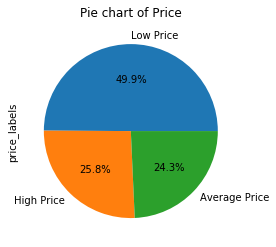

In [18]:
airbnb2.price_labels.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Pie chart of Price')

### Minimum Nights

In [17]:
Q1, Q3 = airbnb_no.minimum_nights.quantile([0.25, 0.75])
airbnb_nights_no = airbnb_no[ (airbnb_no.minimum_nights >= Q1-1.5 * (Q3-Q1)) & (airbnb_no.minimum_nights <= Q3+1.5 * (Q3-Q1))]

In [15]:
lm_nights_no = sm.OLS(airbnb_no.price, sm.add_constant(airbnb_no.minimum_nights)).fit()
lm_nights_no.summary()

/Users/wangluping/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     91.21
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           1.71e-21
Time:                        14:40:43   Log-Likelihood:                -44500.
No. Observations:                7583   AIC:                         8.900e+04
Df Residuals:                    7581   BIC:                         8.902e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            139.3719      1.067    130.586      0.000     137.280     141.464
minimum_nights    -0.2239      0.023     -9.550      0.000      -0.270      -0.178
==============================================================================
Omnibus:                      786.068   Durbin-Watson:                   1.535
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1053.623
Skew:                           0.908   Prob(JB):                    1.62e-229
Kurtosis:                       3.193   Cond. No.                         49.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

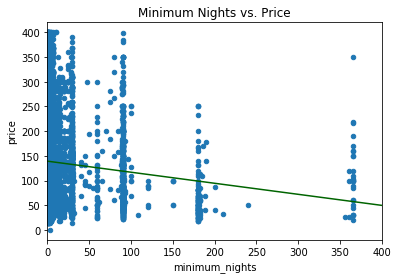

In [152]:
airbnb_no.plot('minimum_nights', 'price', kind = 'scatter', xlim = [0, 400]).set_title('Minimum Nights vs. Price')
xMin = airbnb_no.minimum_nights.min()
#xMax= airbnb_no.minimum_nights.max()
xMax = 400
X = np.linspace(xMin, xMax, 100)
Y = lm_nights_no.params[0] + lm_nights_no.params[1] * X
plt.plot(X, Y, color = 'darkgreen')

### Host Listings

In [16]:
lm_host_no = sm.OLS(airbnb_no.price, sm.add_constant(airbnb_no.calculated_host_listings_count)).fit()
lm_host_no.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     373.7
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           2.60e-81
Time:                        14:41:15   Log-Likelihood:                -44363.
No. Observations:                7583   AIC:                         8.873e+04
Df Residuals:                    7581   BIC:                         8.874e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            123.7686      1.137    108.816      0.000     121.539     125.998
calculated_host_listings_count     0.2826      0.015     19.331      0.000       0.254       0.311
==============================================================================
Omnibus:                      956.866   Durbin-Watson:                   1.561
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1353.492
Skew:                           1.010   Prob(JB):                    1.24e-294
Kurtosis:                       3.455   Cond. No.                         91.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

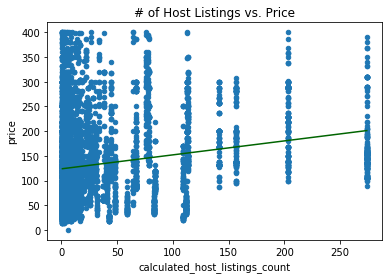

In [154]:
airbnb_no.plot('calculated_host_listings_count', 'price', kind = 'scatter').set_title('# of Host Listings vs. Price')
xMin = airbnb_no.calculated_host_listings_count.min()
xMax= airbnb_no.calculated_host_listings_count.max()
X = np.linspace(xMin, xMax, 100)
Y = lm_host_no.params[0] + lm_host_no.params[1] * X
plt.plot(X, Y, color = 'darkgreen')

### Room Type

In [155]:
RoomGroup = airbnb.groupby(['room_type']).mean()
RoomGroup_no = airbnb_no.groupby(['room_type']).mean()

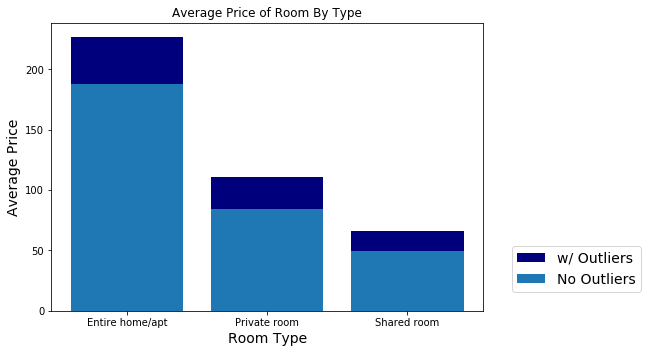

In [156]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(RoomGroup.index, RoomGroup.price, label = 'w/ Outliers', color = '#00007C')
ax.bar(RoomGroup_no.index, RoomGroup_no.price, label = 'No Outliers')
ax.set_xlabel('Room Type', fontsize=14)
ax.set_ylabel('Average Price', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 0.25), fontsize = 14)
plt.title('Average Price of Room By Type')
plt.show()

### Neighborhood Group

In [157]:
RegionGroup = airbnb.groupby(['neighbourhood_group']).mean()
RegionGroup_no = airbnb_no.groupby(['neighbourhood_group']).mean()

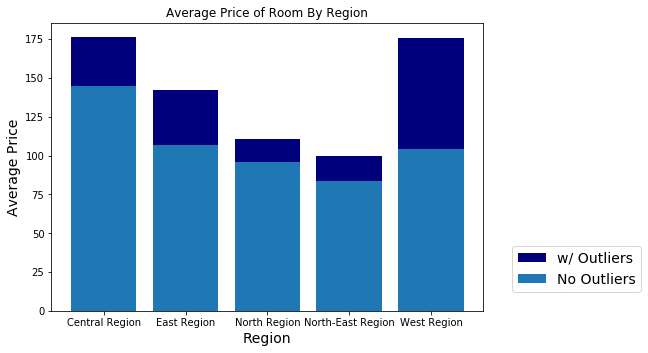

In [158]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(RegionGroup.index, RegionGroup.price, label = 'w/ Outliers', color = '#00007C')
ax.bar(RegionGroup_no.index, RegionGroup_no.price, label = 'No Outliers')
ax.set_xlabel('Region', fontsize = 14)
ax.set_ylabel('Average Price', fontsize = 14)
plt.legend(bbox_to_anchor=(1.05, 0.25), fontsize = 14)
plt.title('Average Price of Room By Region')
plt.show()